### Import Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df_in = pd.read_csv("dataset-for-Machine-learning.csv")

In [3]:
perc_not_null = (df_in.count()/df_in.shape[0])*100 # this gives percentage of non-null entries
cols_to_select = df_in.columns[perc_not_null>5]
print(cols_to_select)

Index(['var39', 'var41', 'var45', 'var56', 'var58', 'var60', 'var61', 'var68',
       'var69', 'var71', 'var72', 'var75', 'var80'],
      dtype='object')


In [4]:
pd.value_counts(df_in.var80) # bath is 1, kitchen is 0

1    607
0    405
Name: var80, dtype: int64

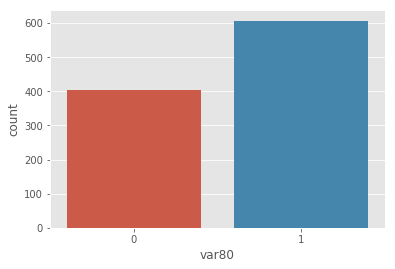

In [5]:
plt.figure()
sns.countplot(x="var80", data=df_in)

In [6]:
df_final = df_in[cols_to_select]

In [7]:
df_final=df_final.fillna(0, axis=1)

In [8]:
df_final.head(n=10)

,var39,var41,var45,var56,var58,var60,var61,var68,var69,var71,var72,var75,var80
0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.742548,0.000000,0.000000,0.780088,0.000000,0.803526,1
1,0.310861,0.0,0.000000,0.987201,0.887975,0.35675,0.000000,0.984366,0.955945,0.000000,0.000000,0.561473,0
2,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.988848,0.000000,0.000000,0.817810,0.000000,0.000000,1
3,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.998717,0.990744,0.734438,0.918015,0.000000,0
4,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.987820,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.503589,0.442770,0.000000,0.402302,0.000000,0
6,0.507197,0.0,0.452301,0.000000,0.000000,0.00000,0.000000,0.996588,0.945150,0.376441,0.845554,0.000000,0
7,0.938599,0.0,0.000000,0.000000,0.000000,0.00000,0.985531,0.795206,0.000000,0.860651,0.000000,0.000000,1
8,0.955575,0.0,0.000000,0.000000,0.000000,0.00000,0.994098,0.000000,0.000000,0.891741,0.000000,0.000000,1
9,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.836569,0.634977,0.000000,0.000000,0


### Build a KNN (k-Nearest Neighbors) Classifier

In [9]:
X = df_final.drop("var80", axis=1)
y = df_final["var80"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [10]:
frac_X_train = (X_train.shape[0]/X.shape[0])*100
frac_X_test = (X_test.shape[0]/X.shape[0])*100
print("frac X_train {0:.2f}%, X_test {1:.2f}% ".format(frac_X_train, frac_X_test))

frac X_train 79.94%, X_test 20.06% 


In [11]:
knn = KNeighborsClassifier() # default value n_neighbors=5

In [12]:
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = knn.predict(X_test)
type(y_pred)
type(y_test)

pandas.core.series.Series

In [14]:
# print the accuracy
knn.score(X_test, y_test)

0.9556650246305419

In [15]:
print(y_test.value_counts())
pd.value_counts(y_pred)

1    122
0     81
Name: var80, dtype: int64


1    121
0     82
dtype: int64

In [16]:
print(confusion_matrix(y_test, y_pred))

[[ 77   4]
 [  5 117]]


In [17]:
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
print("TP {}, FN {}, FP {}, TN {} ".format(TN, FP, FN, TP))
print("accuracy : ", (TP+TN)/(TP+TN+FP+FN))

[[117   5]
 [  4  77]]
TP 117, FN 5, FP 4, TN 77 
accuracy :  0.9556650246305419


In [18]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94        81
          1       0.97      0.96      0.96       122

avg / total       0.96      0.96      0.96       203



In [19]:
y_pred_knn_prob = knn.predict_proba(X_test)
print(y_pred_knn_prob[0:10])
y_pred[0:10]

[[1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]]


array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [20]:
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, y_pred_knn_prob[:,1])

In [21]:
print(knn_fpr)
print(knn_tpr)
print(knn_thresholds)
type(knn_tpr)

[0.         0.01234568 0.04938272 0.09876543 0.18518519 1.        ]
[0.92622951 0.93442623 0.95901639 0.98360656 1.         1.        ]
[1.  0.8 0.6 0.4 0.2 0. ]


numpy.ndarray

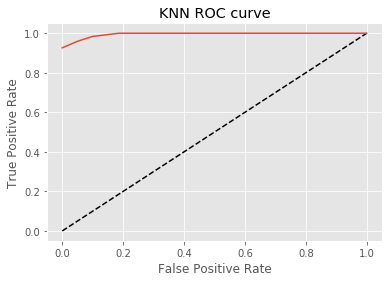

In [22]:
plt.plot([0,1], [0,1], "k--")
plt.plot(knn_fpr, knn_tpr, label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC curve");

In [23]:
auc_score_knn = roc_auc_score(y_test, y_pred_knn_prob[:,1])
print("auc score knn : ", auc_score_knn)

auc score knn :  0.9950414895770088
